In [51]:


import pandas as pd
import numpy as np
import plotnine as p9
import matplotlib.pyplot as plt
import os


date_time = "2023-07-30_19:34"
date_time = "2023-07-31_19:32"

# date_time = "2023-09-08_09:59"
# date_time = "2023-09-08_10:26"
# date_time = "2023-09-08_12:09"
# date_time = "2023-09-08_12:23"
# date_time = "2023-09-08_15:27"
# date_time = "2023-09-10_15:41"
# date_time = "2023-09-08_16:06"

# AROON_Oscillator CrossOver
date_time = "2023-09-10_15:41"
date_time = "2023-09-10_18:40"

# MACD CrossOver
date_time = "2023-09-10_19:07"


root_results_dir = "/projects/genomic-ml/da2343/ml_project_2/hpc/accuracy_tune/orders"
df = pd.read_csv(f"{root_results_dir}/{date_time}_results.csv")
# SELL Signal
# df = df[(df["RSI"] > 60) & (df["ADX"] > 40) & (df["AROON_Oscillator"] == -100)]
# df = df[(df["RSI"] > 60) & (df["ADX"] > 40) & (df["CCI"] > 60)]
# df = df[(df["AROON_Oscillator"] == 100) | (df["AROON_Oscillator"] == -100)]

# df = df[df["year"] == 2017]

# BUY Signal
# df = df[(df["VOLUME_RSI"] < 70) & (df["ADX"] < 30) & (df["position"] != 0)]


df

,index,ask_price,take_profit_price,stop_loss_price,position,SMA_200,MACD,MACD_Signal,MACD_Hist,RSI,...,OBV,CCI,PSAR,AD,ADOSC,VOLUME_RSI,MFI,label,year,dataset_name
0,85786,1.22538,1.23288,1.22038,1,1.222675,-0.001055,-0.001170,1.153608e-04,48.512910,...,535835.0,44.713187,1.221594,-3.425951e+06,-130.081325,52.890900,33.688667,1.0,2021,EURUSD_H1
1,85801,1.22529,1.21779,1.23029,0,1.223071,0.000282,0.000405,-1.228742e-04,42.438773,...,525958.0,-79.053835,1.230751,-3.429883e+06,-3851.544865,56.401177,45.517313,0.0,2021,EURUSD_H1
2,85811,1.22728,1.23478,1.22228,1,1.223425,-0.000110,-0.000177,6.717457e-05,56.475352,...,531535.0,84.205693,1.224223,-3.422439e+06,1027.272748,45.599374,22.883210,0.0,2021,EURUSD_H1
3,85834,1.22789,1.22039,1.23289,0,1.224034,0.000688,0.000745,-5.704778e-05,47.999307,...,538599.0,-43.138994,1.232610,-3.431658e+06,-2772.116400,53.063842,57.077473,0.0,2021,EURUSD_H1
4,85838,1.23166,1.23916,1.22666,1,1.224287,0.000748,0.000684,6.394776e-05,63.665658,...,553062.0,205.327938,1.227570,-3.431676e+06,-2581.590404,47.936951,59.334526,0.0,2021,EURUSD_H1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,41975,1.35861,1.35111,1.36361,0,1.357282,0.000543,0.000599,-5.623673e-05,47.432794,...,336777.0,-46.338722,1.357305,-5.423638e+05,-824.381123,48.536597,50.358890,0.0,2013,EURUSD_H1
5428,41978,1.36392,1.37142,1.35892,1,1.357388,0.000810,0.000604,2.064972e-04,65.503099,...,342682.0,174.572678,1.354310,-5.399440e+05,155.788737,66.637813,65.115733,1.0,2013,EURUSD_H1
5429,41991,1.36666,1.35916,1.37166,0,1.358348,0.001898,0.001943,-4.527742e-05,66.516900,...,351275.0,41.647343,1.362183,-5.375866e+05,539.916800,42.600122,70.954668,0.0,2013,EURUSD_H1
5430,42004,1.36890,1.37640,1.36390,1,1.359245,0.001176,0.001176,3.103026e-07,68.509961,...,354027.0,204.611880,1.362255,-5.386167e+05,163.093543,54.836816,56.578188,1.0,2013,EURUSD_H1


In [48]:
# Make a new accuracy df with columns: year, position, accuracy from the above df using columns 'label', 'position', 'year'

import warnings
warnings.filterwarnings('ignore')

new_df = pd.DataFrame(columns=["year", "position", "accuracy"])
# year starts from 2011 to 2022
# position can be 1 or 0
# accuracy is the accuracy of the position for that year
# accuracy = (number of 1's in the label for that position and year) / (total number of labels for that position and year)
for year in range(2011, 2023):
    for position in [0, 1]:
        try:
            accuracy = df[(df["year"] == year) & (df["position"] == position)]["label"].value_counts()[position] / df[(df["year"] == year) & (df["position"] == position)]["label"].value_counts().sum()
        except:
            accuracy = 0
        new_df = new_df.append({"year": year, "position": position, "accuracy": accuracy}, ignore_index=True)
        
new_df

,year,position,accuracy
0,2011.0,0.0,0.222222
1,2011.0,1.0,0.200000
2,2012.0,0.0,0.625000
3,2012.0,1.0,0.333333
4,2013.0,0.0,0.615385
5,2013.0,1.0,0.538462
6,2014.0,0.0,0.333333
7,2014.0,1.0,0.166667
8,2015.0,0.0,0.692308
9,2015.0,1.0,0.333333


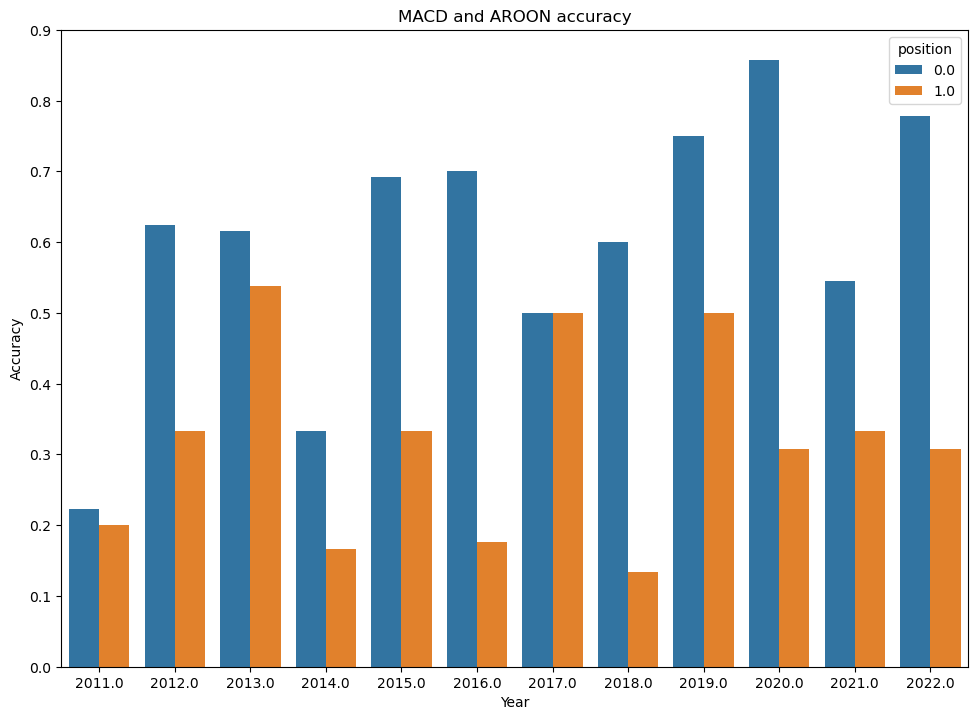

In [50]:

# Import seaborn library
import seaborn as sns

# Create a dataframe from the data
new_df = pd.DataFrame(columns=["year", "position", "accuracy"])
# year starts from 2011 to 2022
# position can be 1 or 0
# accuracy is the accuracy of the position for that year
# accuracy = (number of 1's in the label for that position and year) / (total number of labels for that position and year)
for year in range(2011, 2023):
    for position in [0, 1]:
        try:
            accuracy = df[(df["year"] == year) & (df["position"] == position)]["label"].value_counts()[position] / df[(df["year"] == year) & (df["position"] == position)]["label"].value_counts().sum()
        except:
            accuracy = 0
        new_df = new_df.append({"year": year, "position": position, "accuracy": accuracy}, ignore_index=True)


# Plot a stacked bar graph with accuracy on y-axis and year on x-axis
fig, ax = plt.subplots(figsize=(11.7, 8.27)) # A4 paper dimensions
sns.barplot(x="year", 
            y="accuracy", 
            hue="position", 
            data=new_df, 
            ax = ax,
            )
# change the size of the plot

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Accuracy")
plt.title("MACD and AROON accuracy")

# Show the plot
plt.show()

# save the plot
fig.savefig(f"MACD_and AROON_accuracy_by_year_and_position.png", dpi=300, bbox_inches='tight')

In [ ]:
folders_path = "/projects/genomic-ml/da2343/ml_project_2/data"
dataset_list = ["EURUSD_H1", "USDJPY_H1", "GBPUSD_H1",
                "AUDUSD_H1", "USDCAD_H1", "USDCHF_H1", 
                "EURJPY_H1", "EURGBP_H1"]


for dataset_name in dataset_list:
    raw_df = df[df['dataset_name'] == dataset_name]
    # remove the _H1 from the dataset_name
    symbol = dataset_name[:-3]
    
    raw_df_dir = os.path.join(folders_path, symbol, f"{symbol}_H1_2011_2015_TRADES.csv")
    raw_df.to_csv(raw_df_dir, index=False)
    
    wrangled_df_dir = os.path.join(folders_path, symbol, f"{symbol}_H1_2011_2015_TRADES_REAL.csv")
    # wrangled_df = raw_df[['position', 'RSI', 'ADX', 'WILLR', 'AROON_Oscillator', 'label']]
    wrangled_df = raw_df[['position', 'RSI', 'ADX','label']]
    wrangled_df.reset_index(drop=True, inplace=True)
    wrangled_df = wrangled_df.assign(index=wrangled_df.index)
    wrangled_df.to_csv(wrangled_df_dir, index=False)
    
# print(wrangled_df)
wrangled_df


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

trade_df_test = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2016_2022_TRADES.csv')
# trade_df_test = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/hpc/accuracy_tune/orders/2023-07-30_19:34_results.csv')
trade_df_test = trade_df_test[['position', 'RSI', 'ADX', 'label', 'year']]
# trade_df_test = trade_df_test[trade_df_test['year'] == 2016]
trade_df_test.drop('year', axis=1, inplace=True)


# trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2011_2015_TRADES.csv')
# trade_df = trade_df[[ 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[['position', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI', 'ADX', 'AROON_Oscillator', 'WILLR', 'label']]
# trade_df = trade_df[['position', 'RSI', 'ADX', 'WILLR', 'label']]
# trade_df_test = trade_df_test[['position', 'RSI', 'ADX', 'label']]


# reset index
# trade_df.reset_index(drop=True, inplace=True)

# add an index column to trade_df
# trade_df['index'] = trade_df.index

# save trade_df to csv
# trade_df.to_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2011_2015_TRADES_binary.csv', index=False)

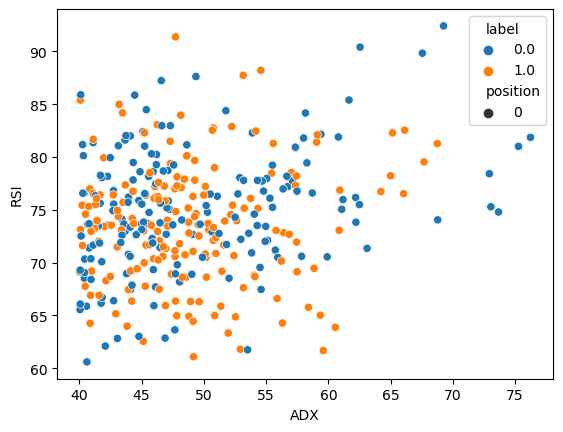

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Load data
# df = pd.read_csv("df.csv")

# Create a scatter plot of ADX vs RSI with label and position as the hue
# x_name = "AROON_Oscillator"
x_name = "ADX"
y_name = "RSI"
sns.scatterplot(data=df, 
                x=x_name, 
                y=y_name, 
                hue="label", 
                style="position")
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

# trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2011_2015_TRADES_synthetic.csv')
trade_df = pd.read_csv('/projects/genomic-ml/da2343/ml_project_2/data/EURUSD/EURUSD_H1_2011_2015_TRADES_REAL.csv')
# drop index column
trade_df = trade_df.drop(columns=['index'])

In [30]:
trade_df

,position,RSI,ADX,label
0,0.0,57.977440,17.064693,1.0
1,0.0,48.461790,11.488081,1.0
2,0.0,45.242132,10.943680,1.0
3,0.0,48.478447,21.981100,1.0
4,0.0,49.459657,34.881962,1.0
...,...,...,...,...
426,0.0,54.809787,23.600573,0.0
427,1.0,58.281142,23.694445,1.0
428,1.0,51.400959,18.498395,1.0
429,1.0,54.286361,23.587833,1.0


In [ ]:
trade_df_test

In [11]:

import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.pipeline import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *

from sklearn.model_selection import RandomizedSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import plotnine as p9

np.set_printoptions(threshold=np.inf)


X_train, y_train = trade_df.iloc[:, :-1].to_numpy(), trade_df.iloc[:, -1]
X_test, y_test = trade_df_test.iloc[:, :-1].to_numpy(), trade_df_test.iloc[:, -1]

# Create and fit random forest model
model = RandomForestClassifier()

# Define parameter grid for GridSearchCV
param_grid = {"n_estimators": [10, 50, 100, 200], "max_depth": [None, 5, 10, 15], "criterion": ["gini", "entropy"]}

# Create GridSearchCV object with precision score as the scoring function
grid_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring="average_precision", cv=5, n_iter = 100)

# Fit grid search on training data
# grid_search.fit(X_train, y_train)

# model = RandomForestClassifier()
grid_search.fit(X_train, y_train)
# y_pred = grid_search.predict(X_test)

y_pred = grid_search.best_estimator_.predict(X_test)


tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
# tn_accuracy = tn / (tn + fp)
# win_rate = tp / (tp + fp)
            
test_acc_dict = {
    "test_accuracy_percent": accuracy_score(y_test, y_pred) * 100,
    # "tn_accuracy": tn_accuracy * 100,
    # "tp_accuracy": tp_accuracy * 100,
    "precision_score": precision_score(y_test, y_pred),
    # "algorithm": algorithm
}

print(test_acc_dict)

/home/da2343/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.


{'test_accuracy_percent': 49.42528735632184, 'precision_score': 0.2926829268292683}


In [ ]:
y_pred

In [ ]:
# {'test_accuracy_percent': 52.87356321839081, 'tn_accuracy': 71.15384615384616, 'tp_accuracy': 25.71428571428571, 'precision_score': 0.375, 'f1_score': 0.30508474576271183}

In [ ]:

# FORECASTING + MACD CROSSOVER
# {'test_accuracy_percent': 55.66218809980806, 'tn_accuracy': 69.64285714285714} for all the years

# {'test_accuracy_percent': 52.87356321839081, 'tn_accuracy': 71.15384615384616} for 2022
# {'test_accuracy_percent': 39.34426229508197, 'tn_accuracy': 65.21739130434783} for 2021
# {'test_accuracy_percent': 58.46153846153847, 'tn_accuracy': 76.19047619047619} for 2020
# {'test_accuracy_percent': 56.25, 'tn_accuracy': 58.92857142857143} for 2019
# {'test_accuracy_percent': 60.49382716049383, 'tn_accuracy': 70.49180327868852} for 2018
# {'test_accuracy_percent': 60.526315789473685, 'tn_accuracy': 76.19047619047619} for 2017
# {'test_accuracy_percent': 58.620689655172406, 'tn_accuracy': 70.0} for 2016

# MACD CROSSOVER
# {'test_accuracy_percent': 55.24475524475524, 'tn_accuracy': 69.58904109589041} just MACD crossover

# {'test_accuracy_percent': 51.06382978723404, 'tn_accuracy': 71.69811320754717} for 2022
# {'test_accuracy_percent': 41.17647058823529, 'tn_accuracy': 62.06896551724138} for 2021
# {'test_accuracy_percent': 54.929577464788736, 'tn_accuracy': 75.0} for 2020
# {'test_accuracy_percent': 56.71641791044776, 'tn_accuracy': 59.32203389830508} for 2019
# {'test_accuracy_percent': 58.139534883720934, 'tn_accuracy': 67.6923076923077} for 2018
# {'test_accuracy_percent': 61.05263157894737, 'tn_accuracy': 79.24528301886792} for 2017
# {'test_accuracy_percent': 60.43956043956044, 'tn_accuracy': 70.96774193548387} for 2016


In [ ]:
test_acc_dict

# Using KFOLD to train and test the various model

In [ ]:
data_dict = {
    'EURUSD_TRADES': (trade_df.iloc[:, :-1].to_numpy(), trade_df.iloc[:, -1] ),
    # 'EURUSD_TRADES_SS': (StandardScaler().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
    # 'EURUSD_TRADES_PT': (PowerTransformer().fit_transform(trade_df.iloc[:, :-1].to_numpy()), trade_df.iloc[:, -1] ),
}

In [ ]:
import pandas as pd
import numpy as np
import plotnine as p9
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.pipeline import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import plotnine as p9

np.set_printoptions(threshold=np.inf)

test_acc_df_list = []


classifier_dict = {
    "KNeighborsClassifier": KNeighborsClassifier(10),
    # "SVC": SVC(kernel="linear", C=0.025),
    # "SVC": SVC(gamma=2, C=1),
    # "GaussianProcessClassifier": GaussianProcessClassifier(1.0 * RBF(1.0)),
    # "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    # "MLPClassifier": MLPClassifier(),
    # "AdaBoostClassifier": AdaBoostClassifier(),
    # "GaussianNB": GaussianNB(),
    # "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": RandomForestClassifier(),
    'DummyClassifier': DummyClassifier(strategy="uniform"),
    'LogisticRegressionCV': LogisticRegressionCV(cv=3, random_state=0, max_iter=1_000),
    
}

for data_set, (input_mat, output_vec) in data_dict.items():
    kf = KFold(n_splits=3, shuffle=True, random_state=1)
    for fold_id, (train_index, test_index) in enumerate(kf.split(input_mat)):
        X_train, X_test = input_mat[train_index], input_mat[test_index]
        y_train, y_test = output_vec[train_index], output_vec[test_index]

        pred_dict = {}
        # iterate over classifiers
        for name, clf in classifier_dict.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pred_dict[name] = y_pred
        
        for algorithm, y_pred in pred_dict.items():
            tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
            tn_accuracy = tn / (tn + fp)
            
            test_acc_dict = {
                "test_accuracy_percent": accuracy_score(y_test, y_pred) * 100,
                "tn_accuracy": tn_accuracy * 100,
                # "precision_score": precision_score(y_test, y_pred),
                # "f1_score": f1_score(y_test, y_pred),
                "data_set": data_set,
                "fold_id": fold_id,
                "algorithm": algorithm
            }
            test_acc_df_list.append(pd.DataFrame(test_acc_dict, index=[0]))
test_acc_df = pd.concat(test_acc_df_list)


test_acc_df = pd.concat(test_acc_df_list)
gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="tn_accuracy",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green", "yellow", "pink"], name= "Fold ID")
gg


In [ ]:
y_pred

In [ ]:
mean_test_acc_df = test_acc_df.groupby(["data_set", "algorithm"]).mean().reset_index()


gg = p9.ggplot() +\
    p9.geom_point(
        p9.aes(
            x="tn_accuracy",
            y="algorithm",
            color = "factor(fold_id)",
        ),
        data=mean_test_acc_df) +\
    p9.facet_wrap("data_set") +\
    p9.scale_color_manual(values=["red", "blue", "green"], name= "Fold ID")
gg
